In [2]:
import os
import pandas as pd
import empyrical as empy
import datetime

import warnings
warnings.filterwarnings("ignore")

In [24]:
main_folder1 = 'result/2022/ML-MPT_alignment/god_view/'
folders1 = [
    'np',
    # 'all1_proba1', 'all1_proba0.5',
    # 'all0_proba0', 'all0_proba0.49',
    # 'y_pp21_100%', #'y_pp21_100%_wrong'
    # 'y_pp21_100%_01', 
    # 'y_pp10_100%', 
    # 'y_pp5_100%', 
]

main_folder2 = 'result/2022/ML-MPT_alignment/ML-preds/'
folders2 = [
    'VoteAll_bySD', 'VoteAll_bySD_01',
    # 'Top5AllLow1_byMSE_MPT', 'Top5AllLow1_byMSE_MPT_01',
    # 'VoteAll_MPT', 'VoteAll_MPT_01',
    # 'Top5VoteAll_byCV_MPT', 'Top5VoteAll_byCV_MPT_01',
    # 'Top10All_byAccuracy_MPT', 'Top10All_byAccuracy_MPT_01',
    'Top5NNLow1_byAccuracy_MPT', 'Top5NNLow1_byAccuracy_MPT_01',
    # 'Top10VoteAll_byCV_MPT', 'Top10VoteAll_byCV_MPT_01',
    # 'Top5AllLow1_byAccuracy_MPT', 'Top5AllLow1_byAccuracy_MPT_01',
    'Top5NNLow1_byMSE_MPT', 'Top5NNLow1_byMSE_MPT_01',
    # 'Top10All_byMSE_MPT', 'Top10All_byMSE_MPT_01',
    'voteEnsemble(Top5NNLow1_byAccuracy_MPT+VoteAll_bySD+Top5NNLow1_byMSE_MPT)',
    'voteEnsemble(Top5NNLow1_byAccuracy_MPT+VoteAll_bySD+Top5NNLow1_byMSE_MPT)_01',

    'voteEnsemble(Top5NNLow1_byAccuracy_MPT+Top5NNLow1_byMSE_MPT)',
    'voteEnsemble(Top5NNLow1_byAccuracy_MPT+Top5NNLow1_byMSE_MPT)_01',
]

folders2 = [
    f for f in os.listdir(main_folder2) if f.startswith('Top5NNLow1_by') and not f.endswith('.csv')
]


folders = []
for folder in folders1:
    folders.append(os.path.join(main_folder1, folder))

for folder in folders2:
    folders.append(os.path.join(main_folder2, folder))


balance = {}
ml_perform = {}
for ml_perform_file in folders:
    sub_folder = ml_perform_file.split('/')[-1]
    # ml_perform_file = os.path.join(main_folder, sub_folder)
    for ff in os.listdir(ml_perform_file):
        if ff.startswith('performance_'):
            ml_perform[sub_folder] = pd.read_csv(os.path.join(ml_perform_file, ff), index_col=0)

    file_path = os.path.join(ml_perform_file, '0', 'trade')
    for pf in os.listdir(file_path):
        file_fol = os.path.join(file_path, pf)
        if not os.path.exists(file_fol):
            print("No folder {}".format(file_fol))
            continue
        if os.path.isdir(file_fol):
            if pf not in balance.keys():
                balance[pf] = pd.DataFrame()
            excel_info = pd.read_excel(
                os.path.join(file_fol, 'Multi Algorithm.xlsx'), sheet_name=['PRFM'], index_col=0)
            bal = excel_info['PRFM']['Portfolio Rebalancing (PFRB)']
            if 'Unnamed 0' in bal.index:
                bal = bal.drop('Unnamed 0')
            bal.index = pd.to_datetime(bal.index)
            bal.name = sub_folder
            balance[pf] = pd.concat([balance[pf], bal], axis=1)


In [41]:
main_folder = 'result/2022/ML-MPT_alignment/MPT_145b/wrong_gamma/'

folders = [
    # '1.4.5b_agg_oldconfig_nzzz_3DTstart',
    # '1.4.5b_agg_oldconfig_nzzz_sameDTstart2003',

    # '1.4.5b_con_oldconfig_nzzz_3DTstart',
    # '1.4.5b_con_oldconfig_nzzz_sameDTstart2003',

    # '1.4.5b_mod_oldconfig_nzzz_3DTstart',
    # '1.4.5b_mod_oldconfig_nzzz_sameDTstart2003',

    # '1.4.5b_ficon_oldconfig_nzzz_3DTstart',
    # '1.4.5b_ficon_oldconfig_nzzz_sameDTstart2003',

    # '1.4.5b_agg_oldconfig_nzzz_comm0.01_3DTstart',
    '1.4.5b_agg_oldconfig_nzzz_Harry_3DTstart',

    # '1.4.5b_mod_oldconfig_nzzz_comm0.01_3DTstart',
    '1.4.5b_mod_oldconfig_nzzz_Harry_3DTstart',

    # '1.4.5b_con_oldconfig_nzzz_comm0.01_3DTstart',
    '1.4.5b_con_oldconfig_nzzz_Harry_3DTstart',

    # '1.4.5b_ficon_oldconfig_nzzz_comm0.01_3DTstart',
    '1.4.5b_ficon_oldconfig_nzzz_Harry_3DTstart',

]



balance = {}
for mpt_perform_file in folders:
    sub_folder = os.path.join(main_folder, mpt_perform_file)
    for case in os.listdir(sub_folder):
        excel_file = os.path.join(sub_folder, case, 'digital_twins_KPIs_.xlsx')
        if not os.path.exists(excel_file):
            print("No file {}".format(excel_file))
            continue
    
        conf = mpt_perform_file.split('_')[-2]
        client = mpt_perform_file.split('_')[1]
        if client not in balance.keys():
            balance[client] = pd.DataFrame()

        excel_info = pd.read_excel(
            excel_file, sheet_name=['History'], index_col=0)
        bal = excel_info['History']['Balance']
        if 'Unnamed 0' in bal.index:
            bal = bal.drop('Unnamed 0')
        bal.index = pd.to_datetime(bal.index)
        # bal.name = (case, conf)
        bal.name = (case, main_folder.split('/')[-2])
        balance[client] = pd.concat([balance[client], bal], axis=1)


In [3]:
main_folder = 'result/2022/ML-MPT_alignment/MPT_145b/correct_gamma/'

folders = [

    '1.4.5b_agg_oldconfig_nzzz_np_3DTstart',
    '1.4.5b_mod_oldconfig_nzzz_np_3DTstart',
    '1.4.5b_con_oldconfig_nzzz_np_3DTstart',
    '1.4.5b_ficon_oldconfig_nzzz_np_3DTstart',

    # '../align_benchmark/1.4.5b_agg_oldconfig_nzzz_fixGamma_3DTstart',
    # '../align_benchmark/1.4.5b_mod_oldconfig_nzzz_fixGamma_3DTstart',
    # '../align_benchmark/1.4.5b_con_oldconfig_nzzz_fixGamma_3DTstart',
    # '../align_benchmark/1.4.5b_ficon_oldconfig_nzzz_fixGamma_3DTstart',

    # '1.4.5b_agg_oldconfig_nzzz_Harry_3DTstart',
    # '1.4.5b_mod_oldconfig_nzzz_Harry_3DTstart',
    # '1.4.5b_con_oldconfig_nzzz_Harry_3DTstart',
    # '1.4.5b_ficon_oldconfig_nzzz_Harry_3DTstart',

    # '1.4.5b_agg_oldconfig_nzzz_Wilson_3DTstart',
    # '1.4.5b_mod_oldconfig_nzzz_Wilson_3DTstart',
    # '1.4.5b_con_oldconfig_nzzz_Wilson_3DTstart',
    # '1.4.5b_ficon_oldconfig_nzzz_Wilson_3DTstart',

    '1.4.5b_agg_oldconfig_nzzz_BL202205v0_3DTstart',
    '1.4.5b_mod_oldconfig_nzzz_BL202205v0_3DTstart',
    '1.4.5b_con_oldconfig_nzzz_BL202205v0_3DTstart',
    '1.4.5b_ficon_oldconfig_nzzz_BL202205v0_3DTstart',

    '1.4.5b_agg_oldconfig_nzzz_BL202205v0-predAlgo_3DTstart',
    '1.4.5b_mod_oldconfig_nzzz_BL202205v0-predAlgo_3DTstart',
    '1.4.5b_con_oldconfig_nzzz_BL202205v0-predAlgo_3DTstart',
    '1.4.5b_ficon_oldconfig_nzzz_BL202205v0-predAlgo_3DTstart',

    # '1.4.5b_agg_oldconfig_nzzz_BL202205v1_3DTstart',
    # '1.4.5b_mod_oldconfig_nzzz_BL202205v1_3DTstart',
    # '1.4.5b_con_oldconfig_nzzz_BL202205v1_3DTstart',
    # '1.4.5b_ficon_oldconfig_nzzz_BL202205v1_3DTstart',

]

cases = None
# cases = [
#     'np_no3vote', 
#     'np_have3vote_202205v0', 'np_have3vote_202205v0Top5NNLow1Corr',
#     'no3vote', 'have3vote_202205v0', 'have3vote_202205v0Top5NNLow1Corr', 
# ]

cases = [
    'no3vote', 'have3vote_202205v0'
]


balance = {}
for mpt_perform_file in folders:
    sub_folder = os.path.join(main_folder, mpt_perform_file)
    for case in os.listdir(sub_folder):
        if cases is not None and case not in cases:
            continue
        excel_file = os.path.join(sub_folder, case, 'digital_twins_KPIs_.xlsx')
        if not os.path.exists(excel_file):
            print("No file {}".format(excel_file))
            continue
    
        conf = mpt_perform_file.split('_')[-2]
        client = mpt_perform_file.split('/')[-1].split('_')[1]
        if client not in balance.keys():
            balance[client] = pd.DataFrame()

        excel_info = pd.read_excel(
            excel_file, sheet_name=['History'], index_col=0)
        bal = excel_info['History']['Balance']
        if 'Unnamed 0' in bal.index:
            bal = bal.drop('Unnamed 0')
        bal.index = pd.to_datetime(bal.index)
        bal.name = (case, conf)
        # bal.name = (case, main_folder.split('/')[-2])
        balance[client] = pd.concat([balance[client], bal], axis=1)

In [4]:
display(balance.keys())
display(balance[list(balance.keys())[0]].columns)


dict_keys(['agg', 'mod', 'con', 'ficon'])

Index([                 ('have3vote_202205v0', 'np'),
                                   ('no3vote', 'np'),
                ('have3vote_202205v0', 'BL202205v0'),
                           ('no3vote', 'BL202205v0'),
       ('have3vote_202205v0', 'BL202205v0-predAlgo'),
                  ('no3vote', 'BL202205v0-predAlgo')],
      dtype='object')

Timestamp('2008-01-02 00:00:00')

Timestamp('2022-07-29 00:00:00')

Timestamp('2008-01-02 00:00:00')

Timestamp('2022-07-29 00:00:00')

Timestamp('2008-01-02 00:00:00')

Timestamp('2022-07-29 00:00:00')

Timestamp('2008-01-02 00:00:00')

Timestamp('2022-07-29 00:00:00')

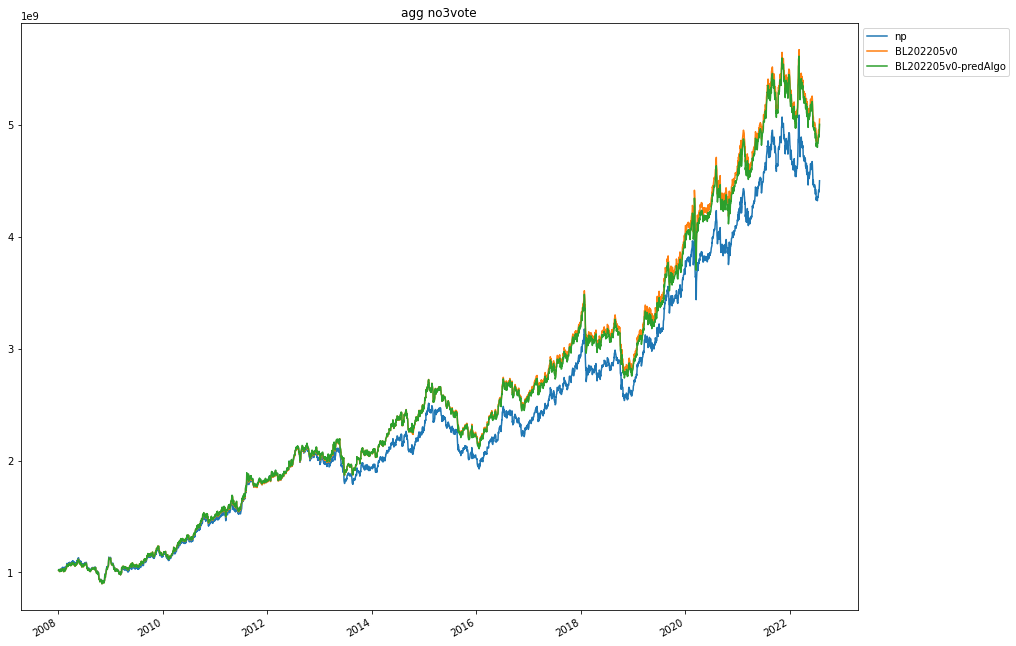

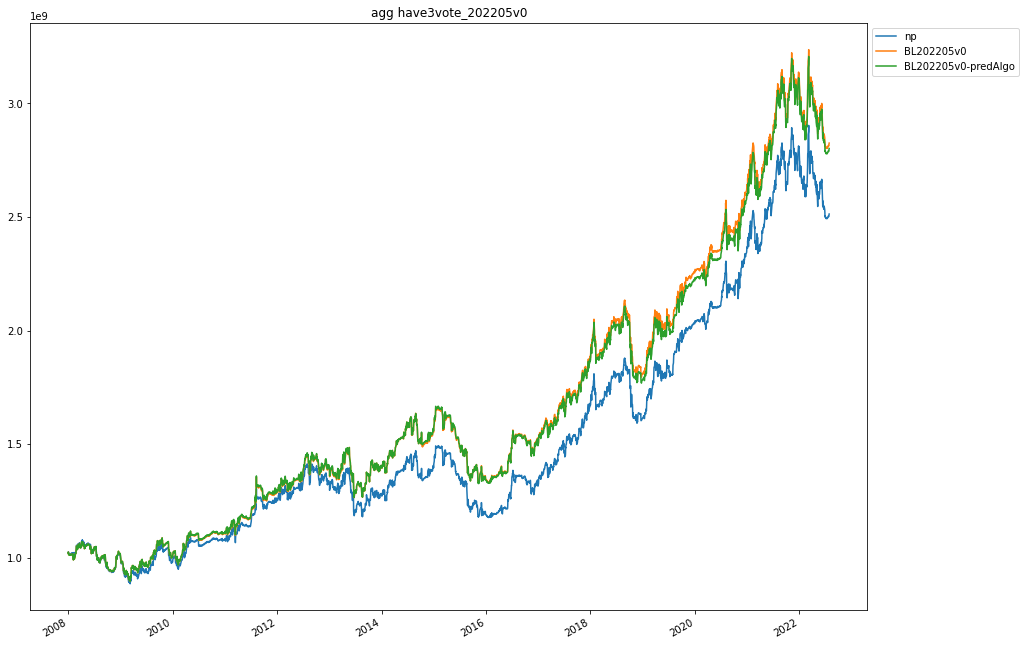

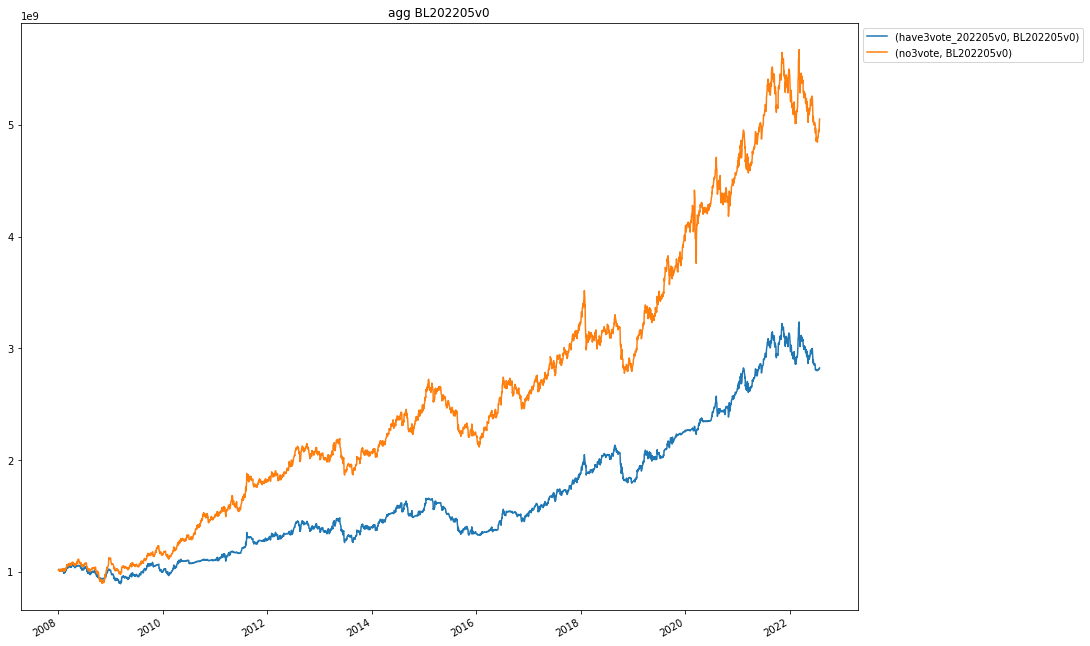

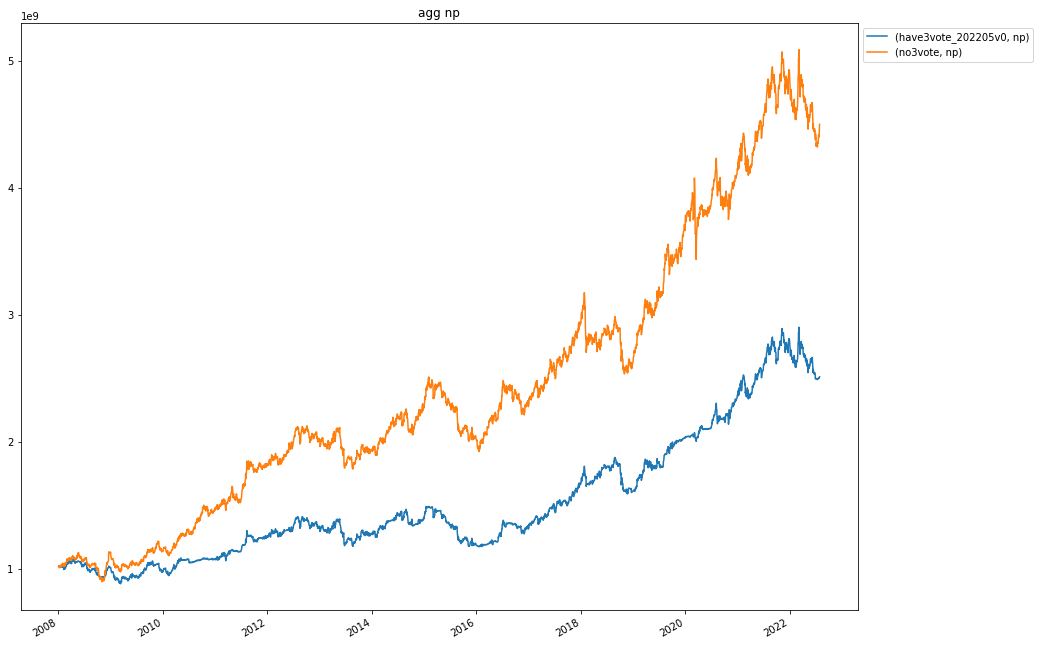

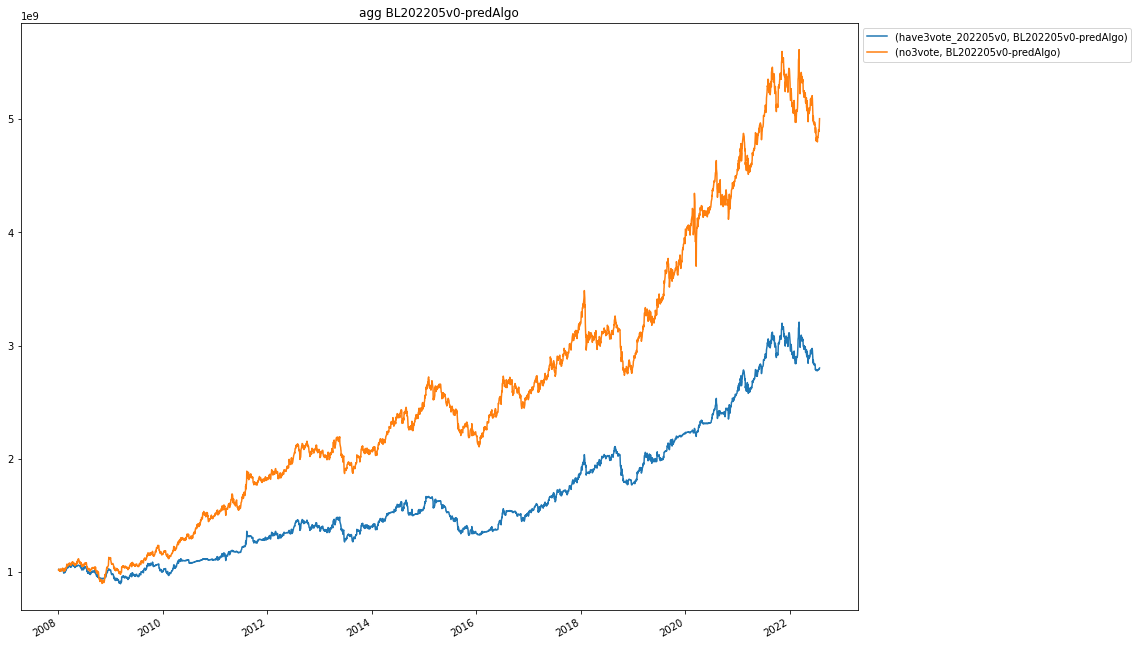

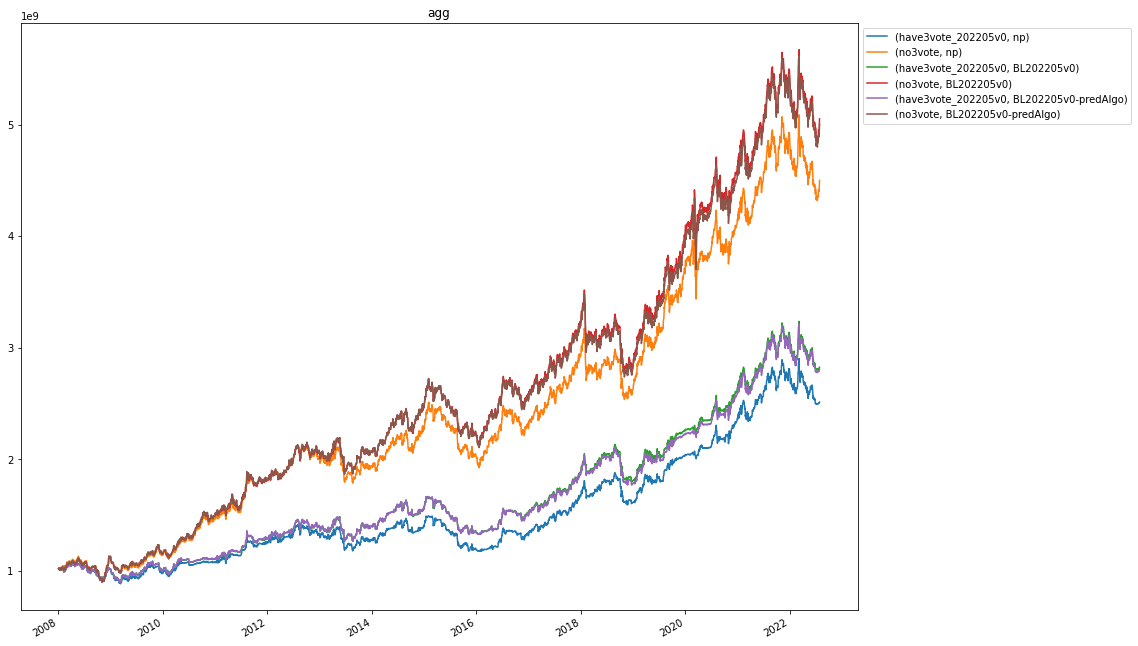

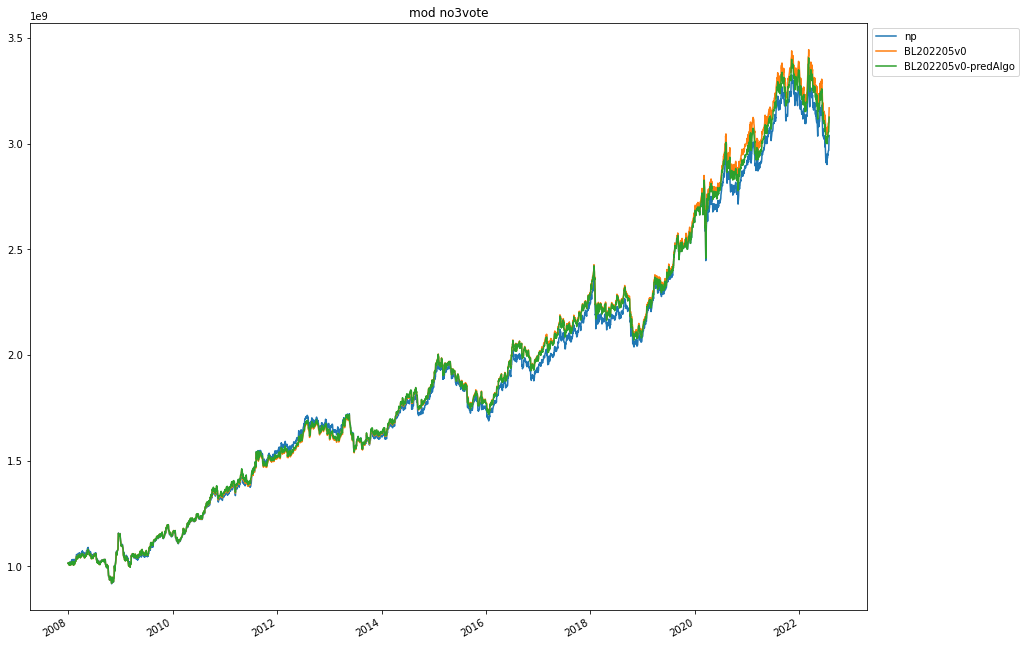

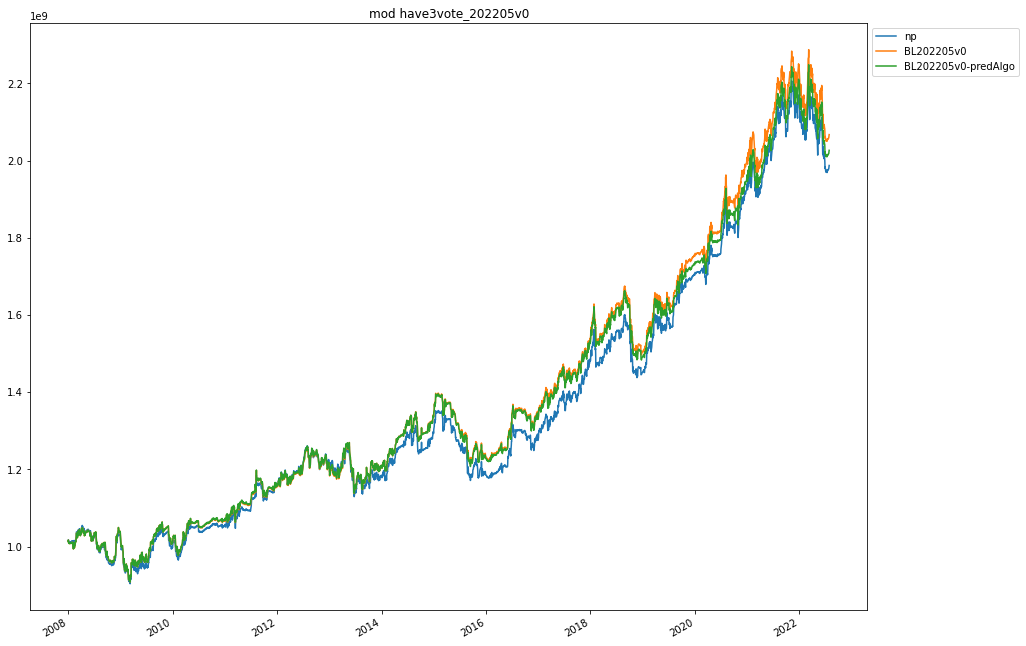

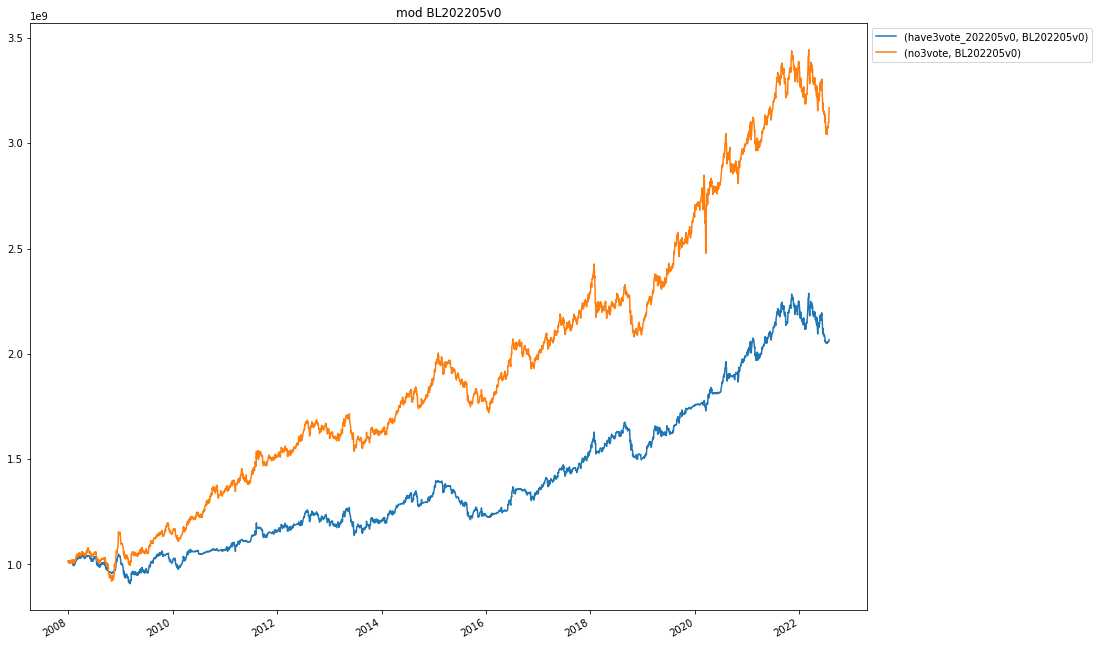

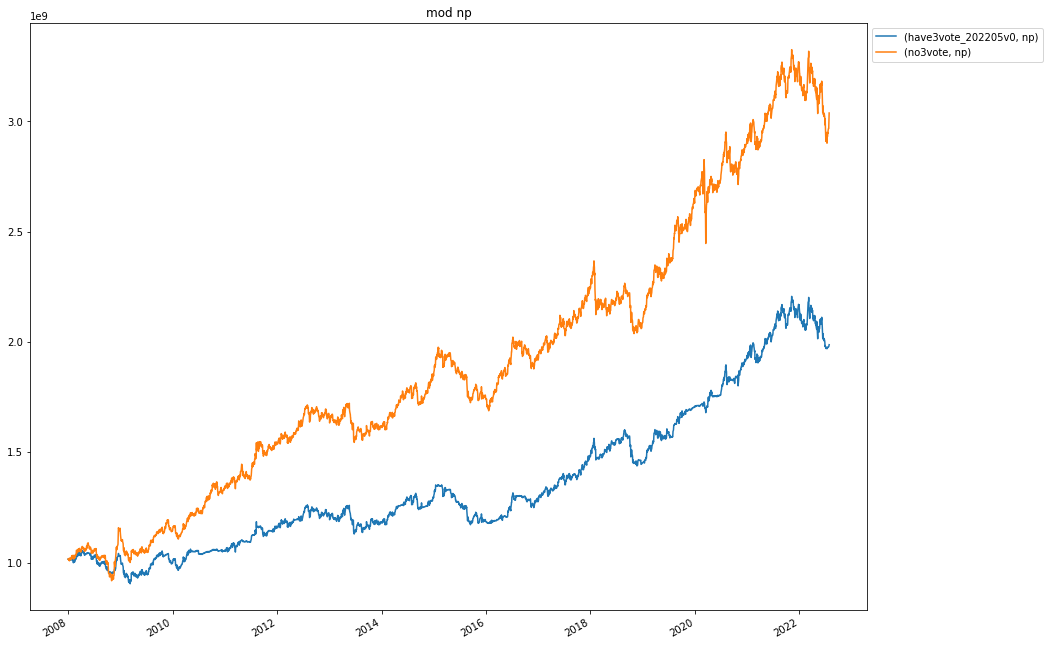

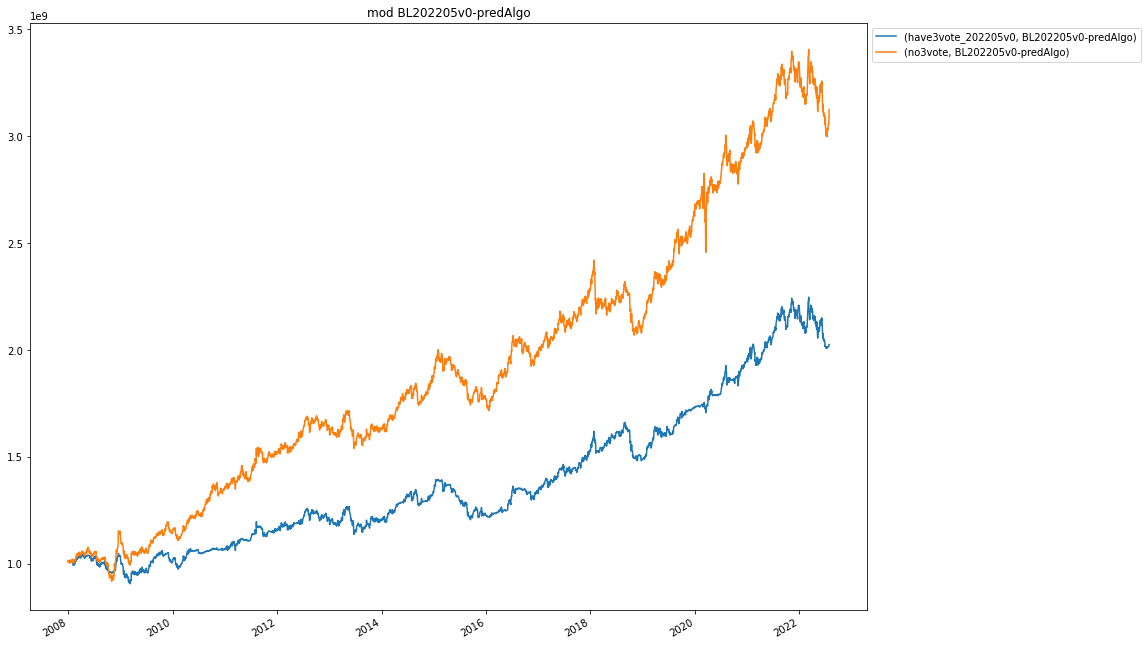

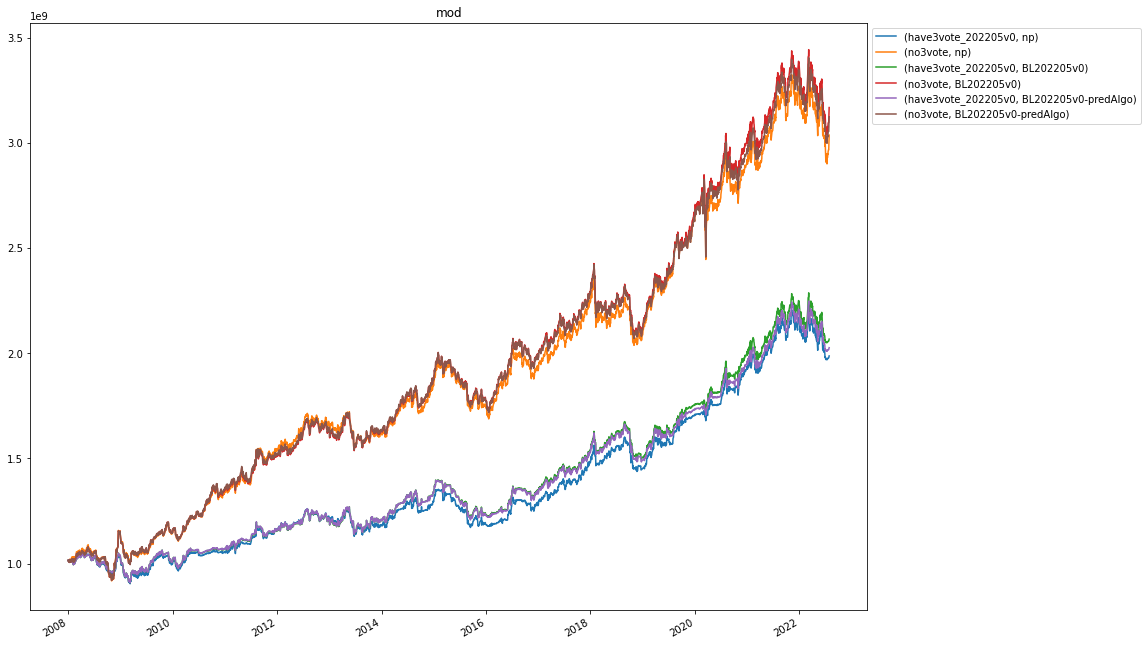

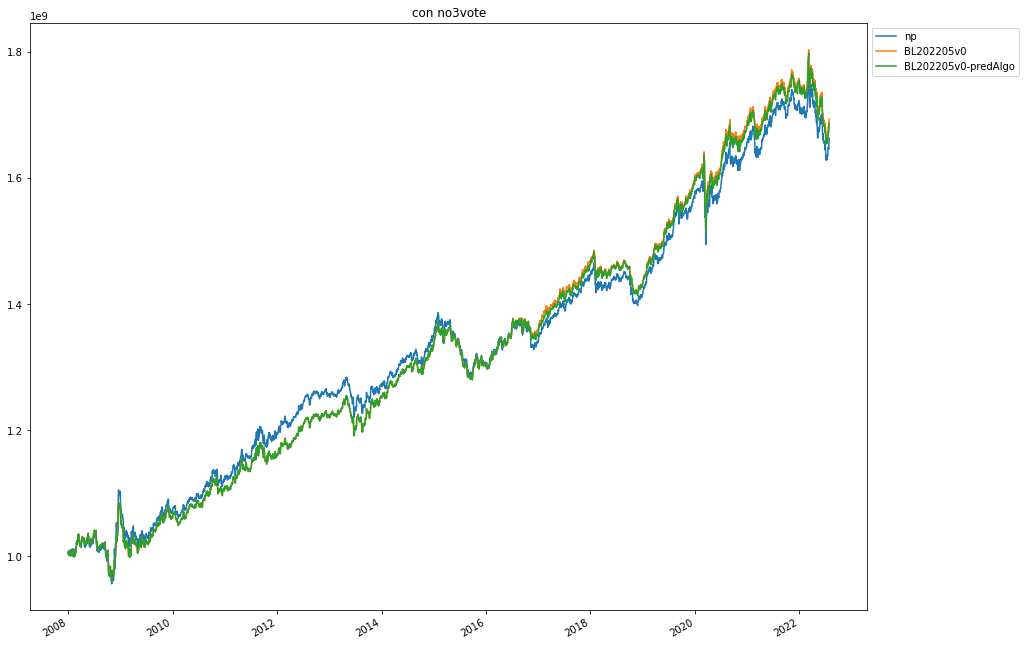

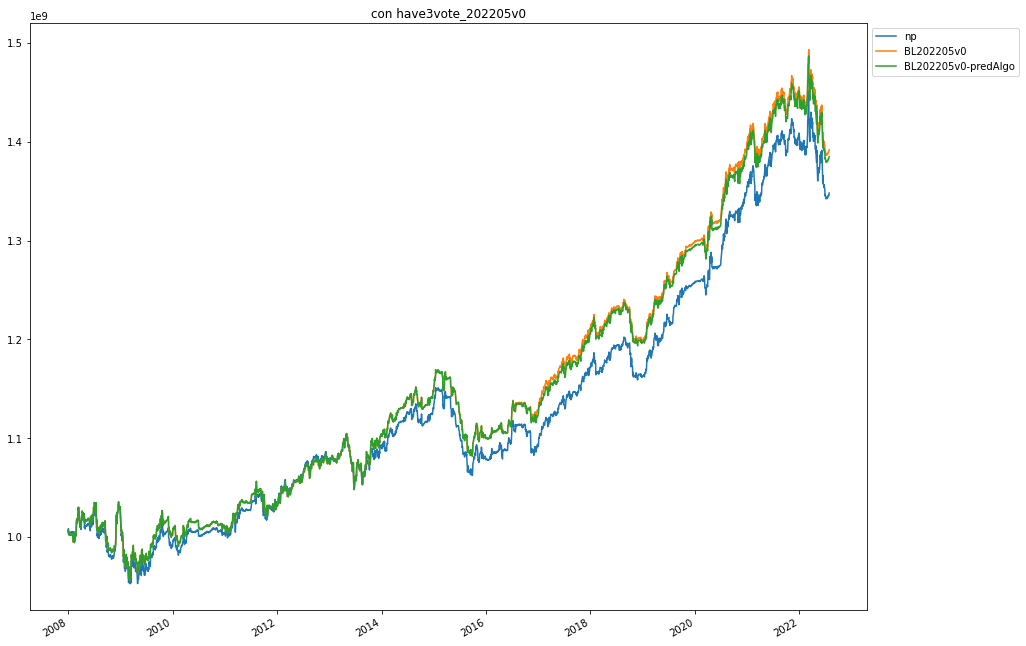

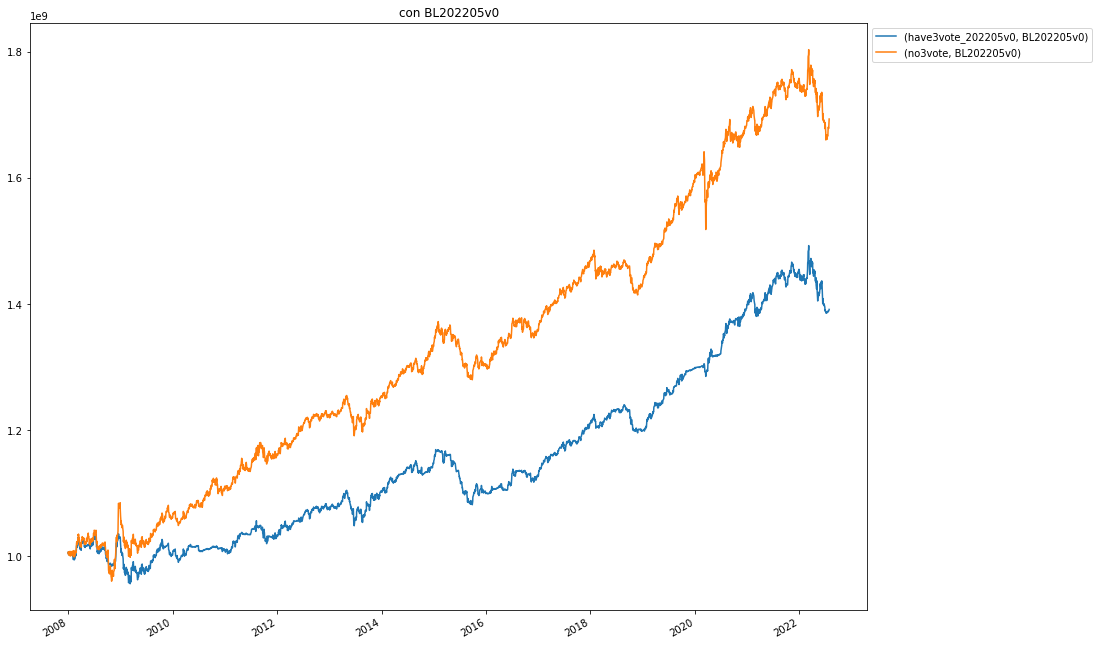

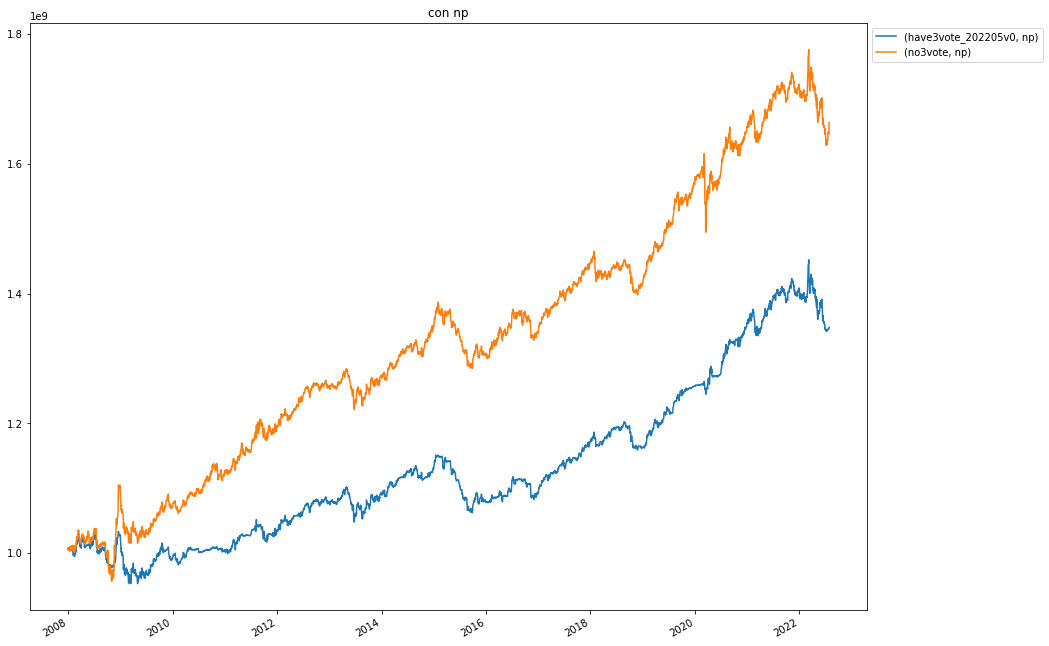

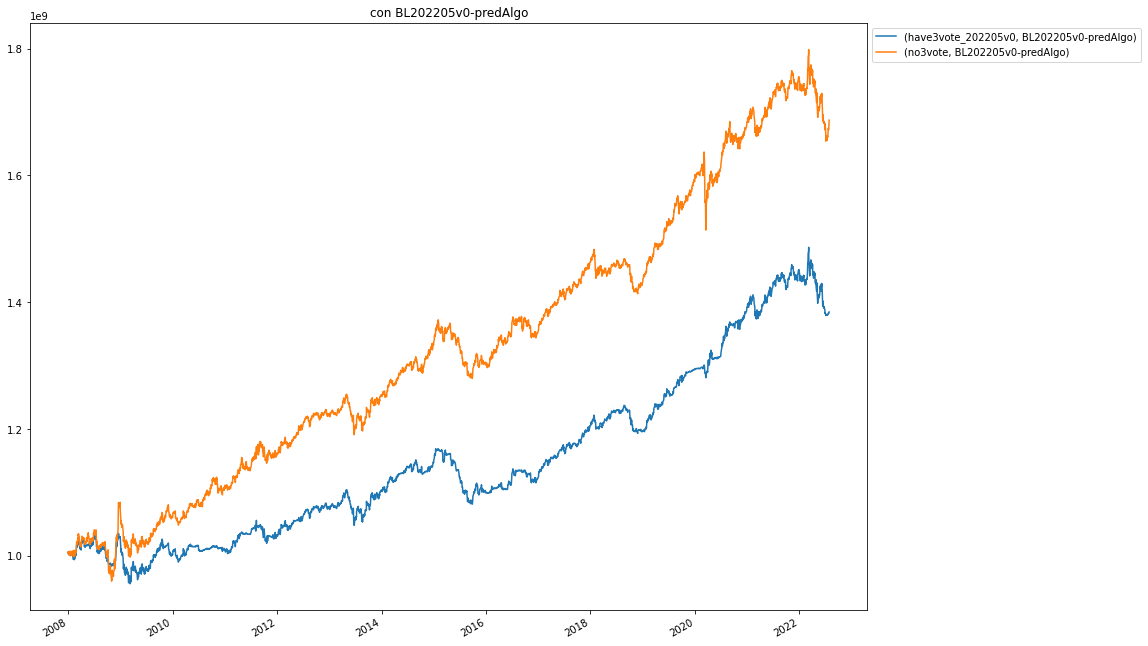

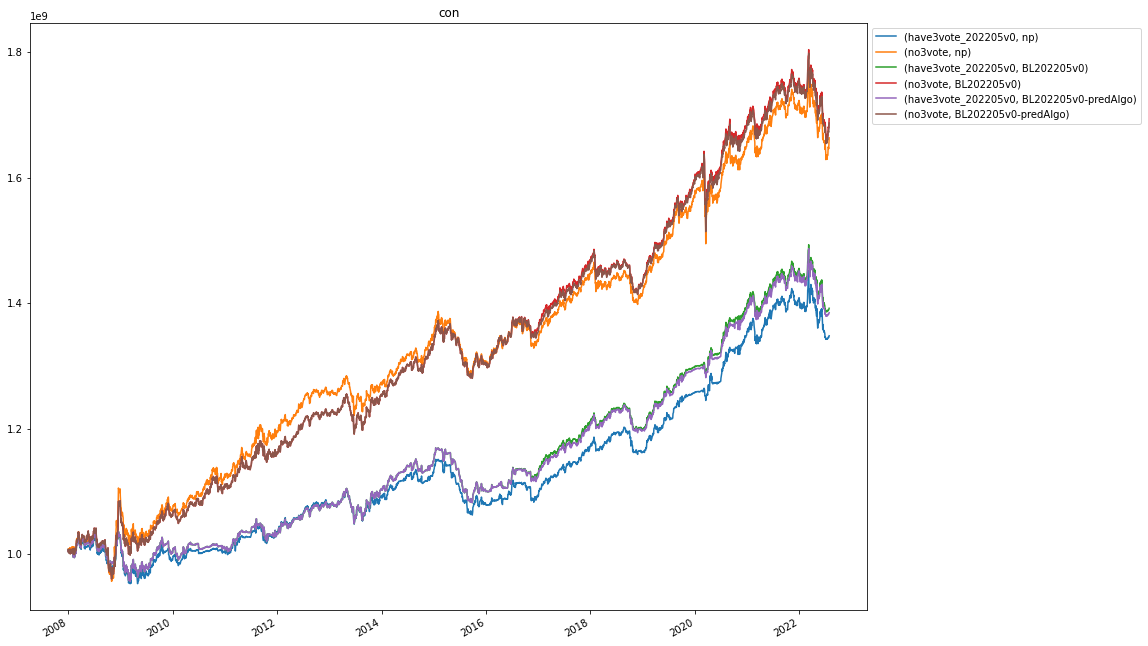

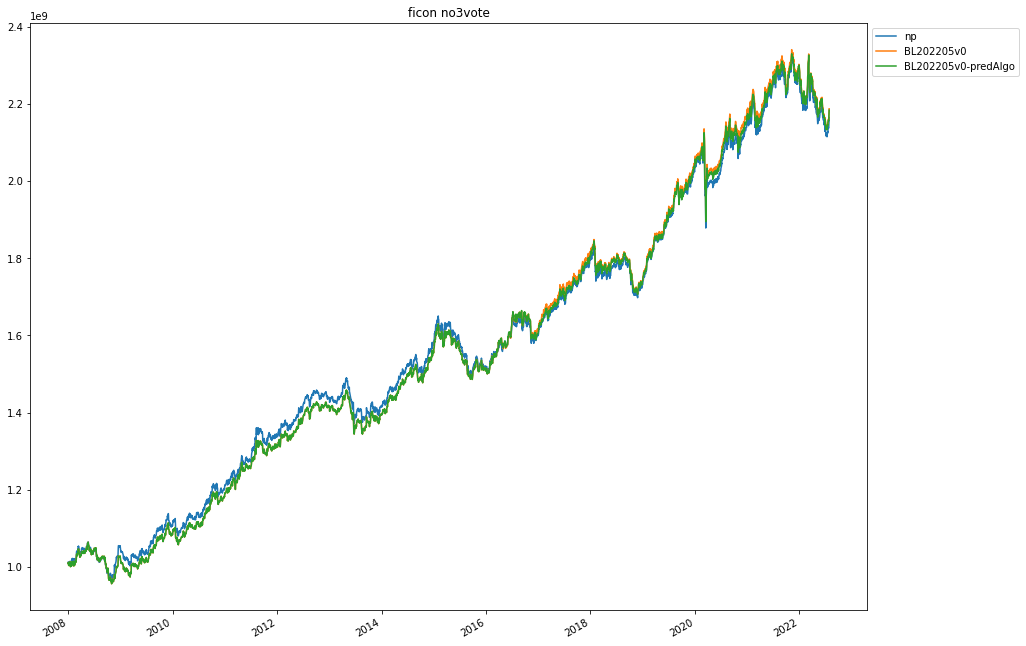

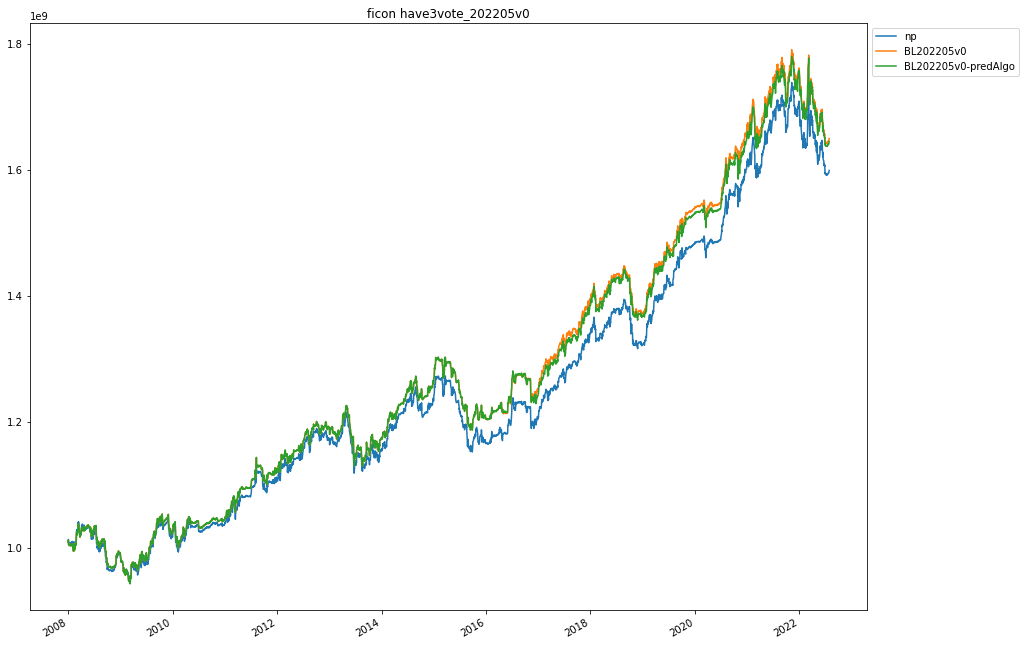

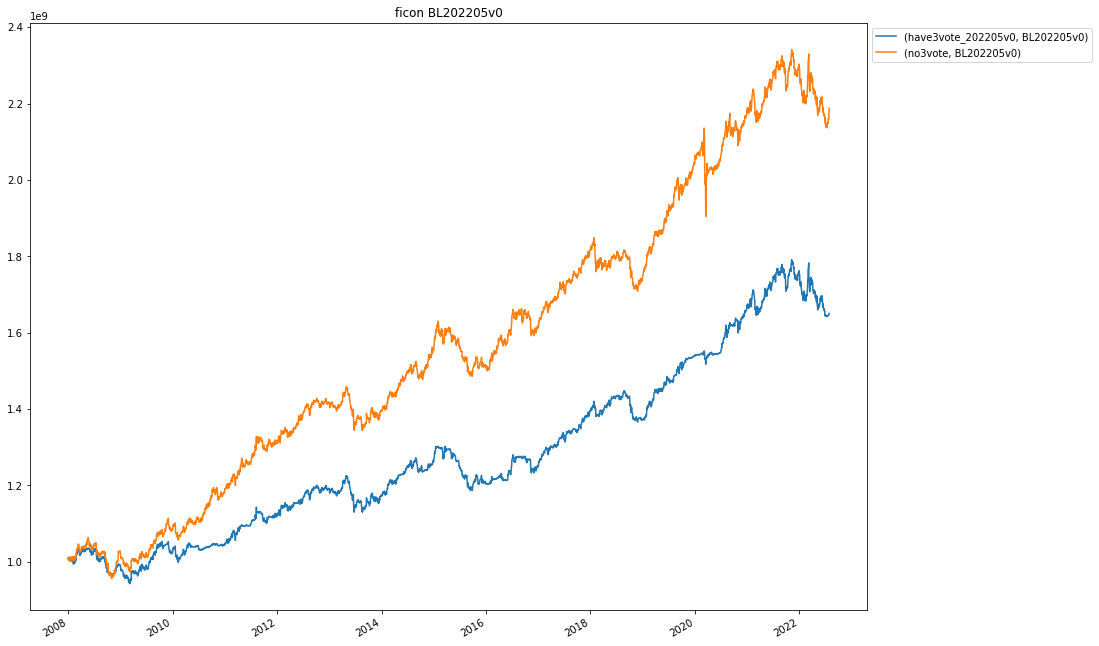

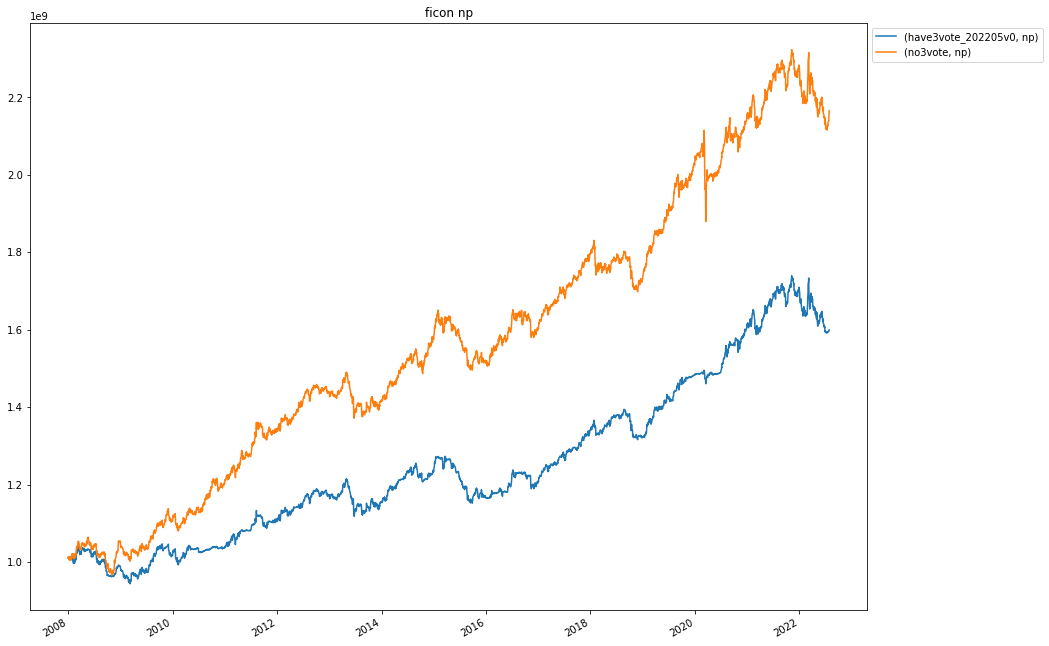

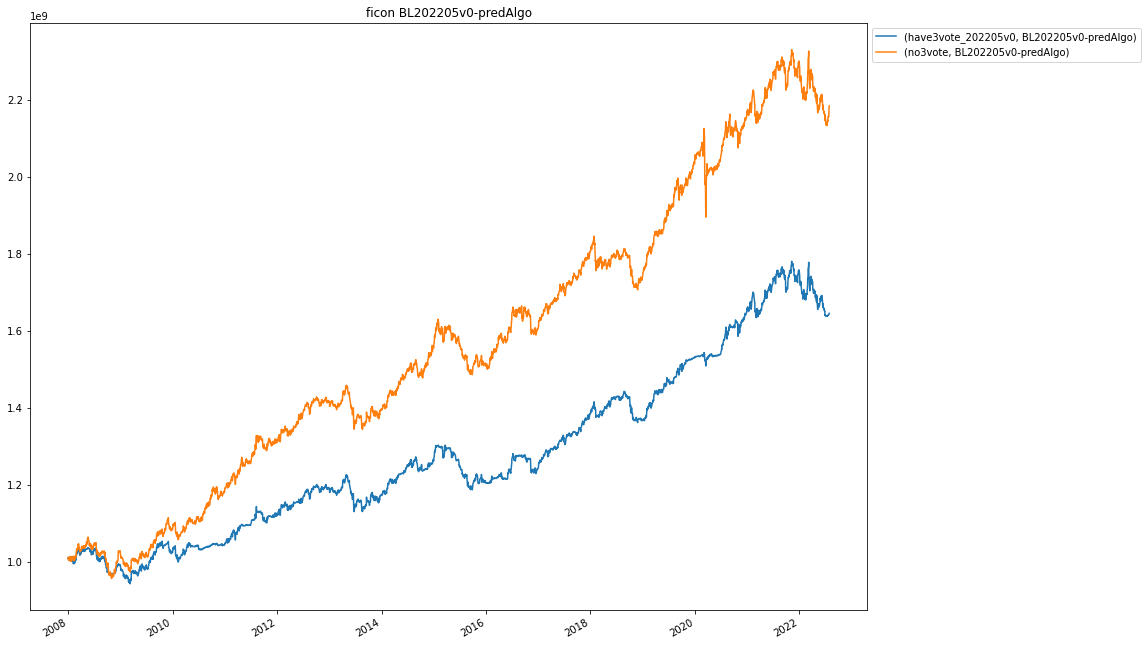

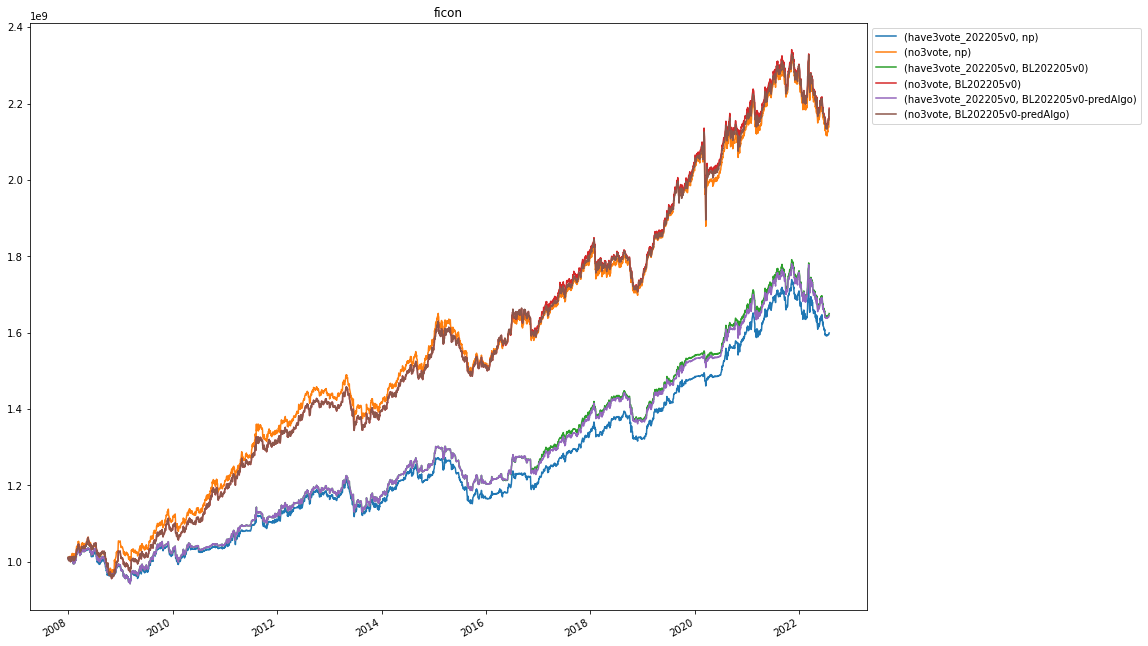

In [5]:
topn = 5
annual_return = {}
total_return = {}
sharpe = {}
max_dd = {}
annual_vol = {}

for pf in balance.keys():
    plot_df = balance[pf]
    plot_df.index = pd.to_datetime(plot_df.index)

    plot_df.columns = pd.MultiIndex.from_tuples(plot_df.columns)
    # plot_df = plot_df.loc[plot_df.index >= datetime.datetime(2022, 1, 1, 0, 0, 0)]
    plot_df = plot_df.loc[plot_df.index < datetime.datetime(2022, 8, 1, 0, 0, 0)]
    # plot_df = plot_df.loc[plot_df.index < datetime.datetime(2015, 12, 31, 0, 0, 0)]

    display(plot_df.index[0], plot_df.index[-1])
    # plot_df = plot_df.loc[:, (plot_df.columns.get_level_values(0) == 'have3vote') | (plot_df.columns.get_level_values(0) == 'no3vote')]
    
    try:
        # plot_df.loc[:, (plot_df.columns.get_level_values(0).str.contains('np_'))].plot(
        #     figsize=(15, 12), title=pf).legend(bbox_to_anchor=(1, 1))
        # plot_df.loc[:, (~plot_df.columns.get_level_values(0).str.contains('np_'))].plot(
        #     figsize=(15, 12), title=pf).legend(bbox_to_anchor=(1, 1))

        for k in list(set(plot_df.columns.get_level_values(0))):
            plot_df[k].plot(figsize=(15, 12), title="{} {}".format(pf, k)).legend(bbox_to_anchor=(1, 1))

        for k in list(set(plot_df.columns.get_level_values(1))):
            plot_df.loc[:, plot_df.columns.get_level_values(1) == k].plot(
                figsize=(15, 12), title="{} {}".format(pf, k)).legend(bbox_to_anchor=(1, 1))
    except:
        plot_df.plot(
            figsize=(15, 12), title=pf).legend(bbox_to_anchor=(1, 1))

    plot_df.plot(
        figsize=(15, 12), title=pf).legend(bbox_to_anchor=(1, 1))


    plot_df_pct = plot_df.pct_change()
    if pf not in total_return.keys():
        annual_return[pf] = pd.DataFrame()
        total_return[pf] = pd.DataFrame()
        sharpe[pf] = pd.DataFrame()
        max_dd[pf] = pd.DataFrame()
        annual_vol[pf] = pd.DataFrame()
    total_return[pf]['overall'] = empy.cum_returns(plot_df_pct).iloc[-1, :]
    annual_return[pf]['overall'] = empy.annual_return(plot_df_pct)
    sharpe[pf]['overall'] = empy.sharpe_ratio(plot_df_pct)
    max_dd[pf]['overall'] = empy.max_drawdown(plot_df_pct)
    annual_vol[pf]['overall'] = empy.annual_volatility(plot_df_pct)


    # topN = list(set(['np'] + list(sharpe[pf].sort_values('overall').index[:topn])))
    # topN = list(sharpe[pf].sort_values('overall').index[:topn])
    # plot_df[topN].plot(figsize=(15, 12), title=pf).legend(bbox_to_anchor=(1, 1))

    # plot_df_pct.index = pd.to_datetime(plot_df_pct.index)
    # for yy in range(2008, 2023):
    #     cum_ret = empy.cum_returns(plot_df_pct[str(yy)])
    #     total_return[pf][str(yy)] = cum_ret.iloc[-1, :]
    #     sharpe[pf][str(yy)] = empy.sharpe_ratio(plot_df_pct[str(yy)])
    #     # cum_ret.plot(figsize=(15, 12), title=pf + " " + str(yy))
    # sharpe[pf].index = plot_df_pct.columns

    
    # loop_period = range(2008, 2023)
    # loop_period = [(2008, 2011), (2012, 2015), (2016, 2022)]
    # loop_period = [(2008, 2015), (2016, 2022)]
    # plot_df_pct.index = pd.to_datetime(plot_df_pct.index)
    # for period in loop_period:
    #     if isinstance(period, tuple):
    #         tmp_pct = plot_df_pct[str(period[0]):str(period[1])]
    #         name = "{} to {}".format(period[0], period[1])
    #     else:
    #         tmp_pct = plot_df_pct[str(period)]
    #         name = str(period)
    #     cum_ret = empy.cum_returns(tmp_pct)
    #     total_return[pf][name] = cum_ret.iloc[-1, :]
    #     annual_return[pf][name] = empy.annual_return(tmp_pct)
    #     # annual_return[pf].index = tmp_pct.columns
    #     sharpe[pf][name] = empy.sharpe_ratio(tmp_pct)
    #     # sharpe[pf].index = tmp_pct.columns
    #     max_dd[pf][name] = empy.max_drawdown(tmp_pct)
    #     # max_dd[pf].index = tmp_pct.columns

    #     cum_ret.plot(figsize=(15, 12), title=pf + " " + name)
    

    annual_return[pf].index = plot_df_pct.columns
    sharpe[pf].index = plot_df_pct.columns
    max_dd[pf].index = plot_df_pct.columns
    annual_vol[pf].index = plot_df_pct.columns

In [ ]:
pf = 'agg'
k = 'no3vote'

plot_df = balance[pf]
plot_df.index = pd.to_datetime(plot_df.index)

plot_df.columns = pd.MultiIndex.from_tuples(plot_df.columns)

# plot_df = plot_df.loc[plot_df.index >= datetime.datetime(2022, 1, 1, 0, 0, 0)]
plot_df = plot_df.loc[plot_df.index < datetime.datetime(2022, 4, 1, 0, 0, 0)]

plot_df[k].plot(figsize=(15, 12), title="{} {}".format(pf, k)).legend(bbox_to_anchor=(1, 1))
plot_df_pct = plot_df[k].pct_change()

loop_period = [(2008, 2015), (2016, 2022)]
# loop_period = range(2008, 2023)
plot_df_pct.index = pd.to_datetime(plot_df_pct.index)
for period in loop_period:
    """
    for m in [(1, 6), (7, 12)]:
        if isinstance(period, tuple):
            s = "{}-{}".format(period[0], m[0])
            e = "{}-{}".format(period[1], m[1])
            tmp_pct = plot_df_pct[s:e]
            name = "{} to {}".format(s, e)
        else:
            if isinstance(m, tuple):
                s = "{}-{}".format(period, m[0])
                e = "{}-{}".format(period, m[1])
                tmp_pct = plot_df_pct[s:e]
                name = "{} to {}".format(s, e)
            else:
                tmp_pct = plot_df_pct[str(period)]
                name = str(period)
        cum_ret = empy.cum_returns(tmp_pct)
        cum_ret.plot(figsize=(15, 12), title=pf + " " + name)
    """

    if isinstance(period, tuple):
        tmp_pct = plot_df_pct[str(period[0]):str(period[1])]
        name = "{} to {}".format(period[0], period[1])
    else:
        tmp_pct = plot_df_pct[str(period)]
        name = str(period)
    cum_ret = empy.cum_returns(tmp_pct)
    cum_ret.plot(figsize=(15, 12), title=pf + " " + name)

In [ ]:
max_dd['agg']

In [6]:
lll = pd.DataFrame()
for pf in total_return.keys():
    display("=========================== {} =============================".format(pf))
    df = pd.concat(
        [annual_return[pf], sharpe[pf], annual_vol[pf], max_dd[pf], total_return[pf]], axis=1,
        keys=['annual_return', 'sharpe', 'annual_vol', 'max_dd', 'total_return']
    )
    df = df.reorder_levels([1,0], axis=1)#.sort_index(axis=1)
    # df.columns = ['annual_return', 'total_return', 'sharpe', 'max_dd']
    df.insert(0, 'pf', pf)

    # df = df.loc[~df.index.get_level_values(0).str.startswith('np_'), :]
    # display(df)
    display(df.sort_values([('overall', 'sharpe')], ascending=False))
    lll = pd.concat([lll, df])
# lll.to_csv('result/2022/ML-MPT_alignment/summary.csv')

'=========================== agg ============================='

pf       overall            \
                                            annual_return    sharpe   
no3vote            BL202205v0           agg      0.116042  0.895367   
                   BL202205v0-predAlgo  agg      0.115318  0.890805   
                   np                   agg      0.107050  0.837552   
have3vote_202205v0 BL202205v0           agg      0.072401  0.684736   
                   BL202205v0-predAlgo  agg      0.071778  0.679296   
                   np                   agg      0.063645  0.612455   

                                                                          
                                       annual_vol    max_dd total_return  
no3vote            BL202205v0            0.132489 -0.222509     3.947614  
                   BL202205v0-predAlgo   0.132430 -0.226841     3.901050  
                   np                    0.131879 -0.233732     3.397741  
have3vote_202205v0 BL202205v0            0.111156 -0.198521     1.767621  
                   BL202205v0-predAlgo   0.111197 -0.204360     1.744291  
                   np                    0.110828 -0.211806     1.456153

'=========================== mod ============================='

pf       overall            \
                                            annual_return    sharpe   
no3vote            BL202205v0           mod      0.081388  0.875793   
                   BL202205v0-predAlgo  mod      0.080352  0.866710   
                   np                   mod      0.078139  0.848462   
have3vote_202205v0 BL202205v0           mod      0.050134  0.672054   
                   BL202205v0-predAlgo  mod      0.048700  0.654697   
                   np                   mod      0.047181  0.637166   

                                                                          
                                       annual_vol    max_dd total_return  
no3vote            BL202205v0            0.094476 -0.147616     2.125274  
                   BL202205v0-predAlgo   0.094346 -0.147616     2.081955  
                   np                    0.093911 -0.157814     1.991304  
have3vote_202205v0 BL202205v0            0.077258 -0.134565     1.038900  
                   BL202205v0-predAlgo   0.077214 -0.135009     0.998739  
                   np                    0.077041 -0.143283     0.956978

'=========================== con ============================='

pf       overall            \
                                            annual_return    sharpe   
no3vote            BL202205v0           con      0.036465  0.851460   
                   BL202205v0-predAlgo  con      0.036182  0.844814   
                   np                   con      0.035087  0.800765   
have3vote_202205v0 BL202205v0           con      0.022582  0.648732   
                   BL202205v0-predAlgo  con      0.022230  0.638211   
                   np                   con      0.020255  0.574533   

                                                                          
                                       annual_vol    max_dd total_return  
no3vote            BL202205v0            0.043173 -0.079783     0.684737  
                   BL202205v0-predAlgo   0.043190 -0.080208     0.678047  
                   np                    0.044306 -0.082850     0.652401  
have3vote_202205v0 BL202205v0            0.035399 -0.076466     0.384335  
                   BL202205v0-predAlgo   0.035445 -0.076466     0.377401  
                   np                    0.036044 -0.077949     0.339155

'=========================== ficon ============================='

pf       overall            \
                                              annual_return    sharpe   
no3vote            BL202205v0           ficon      0.054580  0.959126   
                   BL202205v0-predAlgo  ficon      0.054464  0.957783   
                   np                   ficon      0.053642  0.946585   
have3vote_202205v0 BL202205v0           ficon      0.034352  0.742955   
                   BL202205v0-predAlgo  ficon      0.034142  0.739273   
                   np                   ficon      0.031954  0.694642   

                                                                          
                                       annual_vol    max_dd total_return  
no3vote            BL202205v0            0.057132 -0.108489     1.168310  
                   BL202205v0-predAlgo   0.057094 -0.108495     1.164826  
                   np                    0.056936 -0.111518     1.140374  
have3vote_202205v0 BL202205v0            0.046961 -0.091881     0.635398  
                   BL202205v0-predAlgo   0.046917 -0.091881     0.630576  
                   np                    0.046878 -0.094869     0.581033

In [ ]:
lll['pf'] = lll['pf'].str.replace('17etf_1.4.12_Agg_', "")
lll.sort_values('sharpe', ascending=False,)

In [ ]:
ttt = lll.reset_index(drop=True).set_index('pf')

In [ ]:
# lll.reset_index(drop=True).set_index('pf')
ttt.groupby(['pf'], as_index=False, dropna=True).pct_change().dropna().sort_values('sharpe', ascending=False,)
# lll.sort_values('sharpe', ascending=False,)

In [ ]:
balance_tmp = pd.concat(balance.values(), keys=balance.keys(), axis=1)
balance_tmp.index = pd.to_datetime(balance_tmp.index)
return_df = balance_tmp.pct_change().dropna()
# print(balance_tmp)
plot_df = balance_tmp.loc[:, balance_tmp.columns.get_level_values(0).str.contains('nopreds_')]
plot_return_df = return_df.loc[:, return_df.columns.get_level_values(0).str.contains('nopreds_')]

# plot_df = plot_df.loc[plot_df.index >= datetime.datetime(2022, 1, 1, 0, 0, 0)]
plot_return_df = plot_return_df.loc[plot_return_df.index < datetime.datetime(2022, 4, 1, 0, 0, 0)]
# print(plot_return_df)
res = pd.DataFrame()
res['total_return'] = empy.cum_returns(plot_return_df).iloc[-1, :]
res['annual_return'] = empy.annual_return(plot_return_df)
# annual_return.index = plot_return_df.columns
res['sharpe'] = empy.sharpe_ratio(plot_return_df)
# sharpe.index = plot_return_df.columns
max_dd = empy.max_drawdown(plot_return_df)
max_dd.index = plot_return_df.columns
res['max_dd'] = max_dd

for pc in ['original']:
    empy.cum_returns(
        plot_return_df.loc[:, plot_return_df.columns.get_level_values(1)==pc]).plot(
            figsize=(15, 12), title=pc).legend(bbox_to_anchor=(1, 1))
    for y in range(2008, 2023):
        empy.cum_returns(
            plot_return_df.loc[str(y), plot_return_df.columns.get_level_values(1)==pc]).plot(
                figsize=(15, 12), title=str(y) + ' ' + pc).legend(bbox_to_anchor=(1, 1))


In [ ]:
res


In [ ]:
lll = pd.DataFrame()
for pf in sharpe.keys():
    display("=========================== {} =============================".format(pf))
    df = pd.concat([annual_return[pf], total_return[pf], sharpe[pf], max_dd[pf]], axis=1)
    df.columns = ['annual_return', 'total_return', 'sharpe', 'max_dd']
    df.insert(0, 'pf', pf)
    display(df)#.sort_values('overall')
    lll = pd.concat([lll, df])
# lll.to_csv('result/2022/ML-MPT_alignment/summary.csv')

In [ ]:
#lll.sort_values('sharpe', ascending=False).to_csv('result/2022/ML-MPT_alignment/choosen_config_3vote_summary.csv')

for conf in ['oldconfig', 'newconfig', 'wilsonConf']:
    display("=========================== {} =============================".format(conf))
    tmp = lll[lll['pf'].str.endswith(conf)]
    display(tmp.sort_values('sharpe', ascending=False))

In [ ]:
topn = 5
annual_return = {}
total_return = {}
sharpe = {}
max_dd = {}
for pf in balance.keys():
    plot_df = balance[pf]
    plot_df.index = pd.to_datetime(plot_df.index)

    # plot_df = plot_df.loc[plot_df.index >= datetime.datetime(2022, 1, 1, 0, 0, 0)]
    plot_df = plot_df.loc[plot_df.index < datetime.datetime(2022, 4, 1, 0, 0, 0)]
    
    plot_df.plot(figsize=(15, 12), title=pf).legend(bbox_to_anchor=(1, 1))

    plot_df_pct = plot_df.pct_change()
    if pf not in total_return.keys():
        annual_return[pf] = pd.DataFrame()
        total_return[pf] = pd.DataFrame()
        sharpe[pf] = pd.DataFrame()
        max_dd[pf] = pd.DataFrame()
    total_return[pf]['overall'] = empy.cum_returns(plot_df_pct).iloc[-1, :]
    annual_return[pf]['overall'] = empy.annual_return(plot_df_pct)
    annual_return[pf].index = plot_df_pct.columns
    sharpe[pf]['overall'] = empy.sharpe_ratio(plot_df_pct)
    sharpe[pf].index = plot_df_pct.columns
    max_dd[pf]['overall'] = empy.max_drawdown(plot_df_pct)
    max_dd[pf].index = plot_df_pct.columns

In [ ]:
ml_perform_df = pd.concat(ml_perform.values(), keys=ml_perform.keys(), axis=1)
ml_perform_df

In [ ]:
ml_perform_df.mean()